### 1. 데이터 불러오기 및 살펴보기

In [9]:
import pandas as pd
TimeAge=pd.read_csv('C:/Users/HOME/Desktop/수DA쟁이/20201127_TEAMPROJECT_4/코로나19/coronavirusdataset_20200601/TimeAge.csv')

In [10]:
TimeAge.head(10)

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
5,2020-03-02,0,50s,834,5
6,2020-03-02,0,60s,530,6
7,2020-03-02,0,70s,192,6
8,2020-03-02,0,80s,81,3
9,2020-03-03,0,0s,34,0


#### 컬럼명 한글로 변환

In [11]:
TimeAge.drop(['time'],axis=1,inplace=True)
TimeAge= TimeAge.rename(columns={'date':"날짜",'age':"나이",'confirmed':"확진자수",'deceased':"사망자수"})
TimeAge_=TimeAge[TimeAge['날짜']=='2020-05-31']
TimeAge_

,날짜,나이,확진자수,사망자수
810,2020-05-31,0s,157,0
811,2020-05-31,10s,655,0
812,2020-05-31,20s,3176,0
813,2020-05-31,30s,1292,2
814,2020-05-31,40s,1521,3
815,2020-05-31,50s,2039,15
816,2020-05-31,60s,1405,39
817,2020-05-31,70s,725,80
818,2020-05-31,80s,498,131


#### 나이 기준으로 묶기

In [12]:
AgeGroup=TimeAge_.groupby(['나이']).sum()
AgeGroup

,확진자수,사망자수
나이,,
0s,157,0
10s,655,0
20s,3176,0
30s,1292,2
40s,1521,3
50s,2039,15
60s,1405,39
70s,725,80
80s,498,131


In [13]:
TimeAge=TimeAge.sort_values(['나이','날짜'])
TimeAge

,날짜,나이,확진자수,사망자수
0,2020-03-02,0s,32,0
9,2020-03-03,0s,34,0
18,2020-03-04,0s,34,0
27,2020-03-05,0s,38,0
36,2020-03-06,0s,45,0
...,...,...,...,...
782,2020-05-27,80s,492,131
791,2020-05-28,80s,492,131
800,2020-05-29,80s,495,131
809,2020-05-30,80s,498,131


In [18]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
 
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

Text(0.5, 0, '나이')

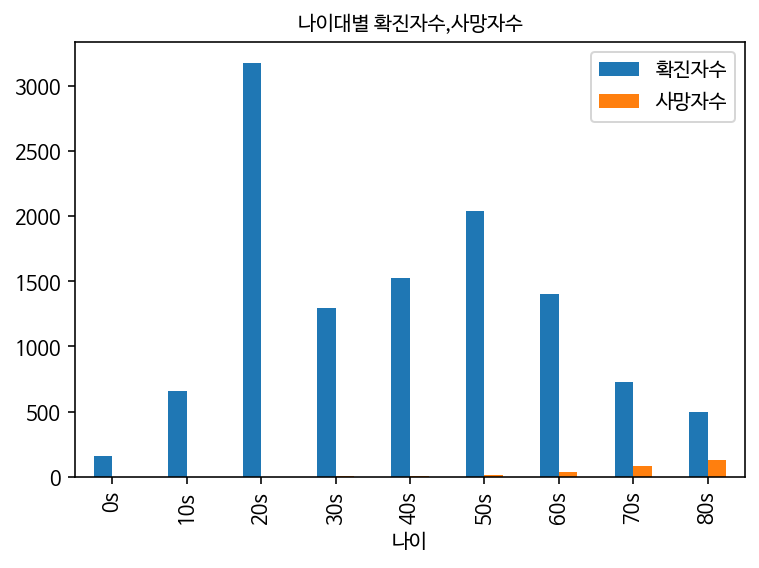

In [20]:
import matplotlib.pyplot as plt
AgeGroup.plot(kind='bar')
plt.title('나이대별 확진자수,사망자수',size=10)
plt.xlabel('나이', size=10)

In [21]:
TimeAge=TimeAge.set_index('날짜')
TimeAge

,나이,확진자수,사망자수
날짜,,,
2020-03-02,0s,32,0
2020-03-03,0s,34,0
2020-03-04,0s,34,0
2020-03-05,0s,38,0
2020-03-06,0s,45,0
...,...,...,...
2020-05-27,80s,492,131
2020-05-28,80s,492,131
2020-05-29,80s,495,131


In [22]:
df=pd.DataFrame()
df['0s']=TimeAge[TimeAge['나이']=='0s']['확진자수']
df['10s']=TimeAge[TimeAge['나이']=='10s']['확진자수']
df['20s']=TimeAge[TimeAge['나이']=='20s']['확진자수']
df['30s']=TimeAge[TimeAge['나이']=='30s']['확진자수']
df['40s']=TimeAge[TimeAge['나이']=='40s']['확진자수']
df['50s']=TimeAge[TimeAge['나이']=='50s']['확진자수']
df['60s']=TimeAge[TimeAge['나이']=='60s']['확진자수']
df['70s']=TimeAge[TimeAge['나이']=='70s']['확진자수']
df['80s']=TimeAge[TimeAge['나이']=='80s']['확진자수']
df

,0s,10s,20s,30s,40s,50s,60s,70s,80s
날짜,,,,,,,,,
2020-03-02,32,169,1235,506,633,834,530,192,81
2020-03-03,34,204,1417,578,713,952,597,224,93
2020-03-04,34,233,1575,631,790,1051,646,260,108
2020-03-05,38,257,1727,659,847,1127,699,288,124
2020-03-06,45,292,1877,693,889,1217,763,340,168
...,...,...,...,...,...,...,...,...,...
2020-05-27,153,640,3131,1248,1489,2002,1386,724,492
2020-05-28,155,644,3146,1274,1503,2014,1392,724,492
2020-05-29,156,650,3158,1283,1513,2023,1400,724,495


In [23]:
df_=pd.DataFrame()
df_['0s']=TimeAge[TimeAge['나이']=='0s']['사망자수']
df_['10s']=TimeAge[TimeAge['나이']=='10s']['사망자수']
df_['20s']=TimeAge[TimeAge['나이']=='20s']['사망자수']
df_['30s']=TimeAge[TimeAge['나이']=='30s']['사망자수']
df_['40s']=TimeAge[TimeAge['나이']=='40s']['사망자수']
df_['50s']=TimeAge[TimeAge['나이']=='50s']['사망자수']
df_['60s']=TimeAge[TimeAge['나이']=='60s']['사망자수']
df_['70s']=TimeAge[TimeAge['나이']=='70s']['사망자수']
df_['80s']=TimeAge[TimeAge['나이']=='80s']['사망자수']
df_

,0s,10s,20s,30s,40s,50s,60s,70s,80s
날짜,,,,,,,,,
2020-03-02,0,0,0,1,1,5,6,6,3
2020-03-03,0,0,0,1,1,5,7,9,5
2020-03-04,0,0,0,1,1,5,7,12,6
2020-03-05,0,0,0,1,1,5,8,13,7
2020-03-06,0,0,0,1,1,5,11,14,10
...,...,...,...,...,...,...,...,...,...
2020-05-27,0,0,0,2,3,15,39,79,131
2020-05-28,0,0,0,2,3,15,39,79,131
2020-05-29,0,0,0,2,3,15,39,79,131


(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 7 Text xticklabel objects>)

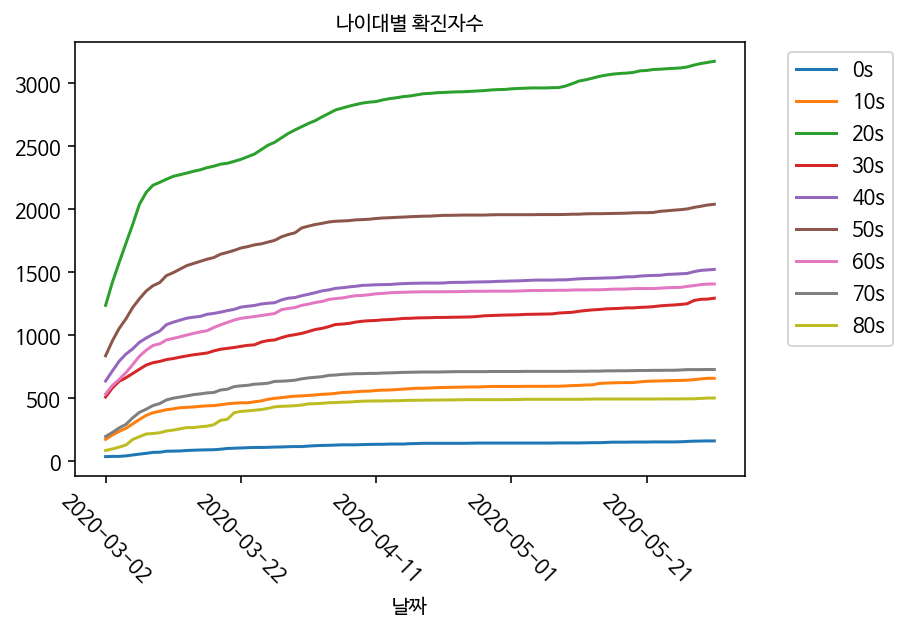

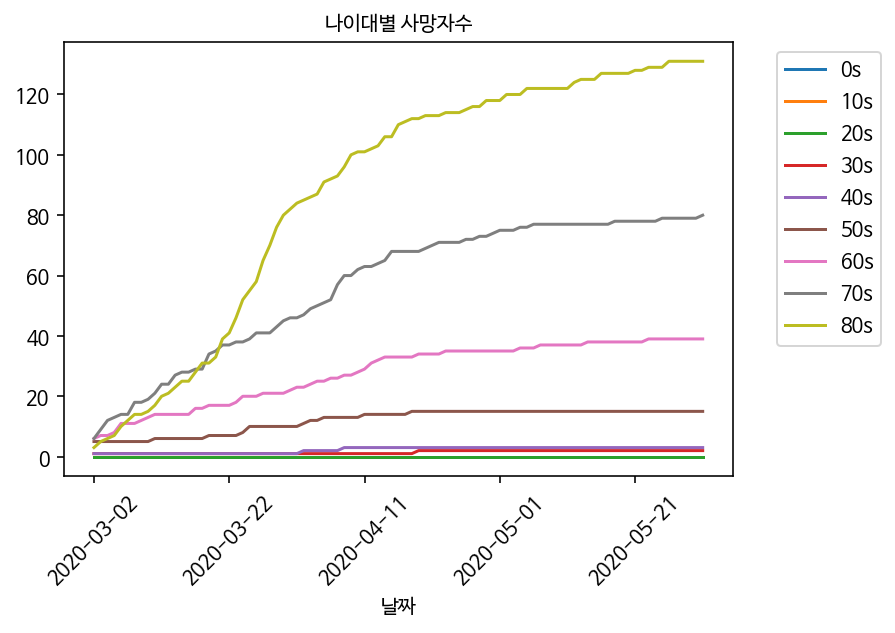

In [24]:
df.plot()
plt.legend(bbox_to_anchor=(1.05,1))
plt.title('나이대별 확진자수',size=10)
plt.xlabel('날짜', size=10)
plt.xticks(rotation=-45)
df_.plot()
plt.legend(bbox_to_anchor=(1.05,1))
plt.title('나이대별 사망자수',size=10)
plt.xlabel('날짜', size=10)
plt.xticks(rotation=45)

In [25]:
TimeGender=pd.read_csv('C:/Users/HOME/Desktop/수DA쟁이/20201127_TEAMPROJECT_4/코로나19/coronavirusdataset_20200601/TimeGender.csv')

In [26]:
TimeGender.head(20)

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
5,2020-03-04,0,female,3332,12
6,2020-03-05,0,male,2149,21
7,2020-03-05,0,female,3617,14
8,2020-03-06,0,male,2345,25
9,2020-03-06,0,female,3939,17


In [27]:
TimeGender.drop(['time'],axis=1,inplace=True)

In [28]:
TimeGender= TimeGender.rename(columns={'date':"날짜",'sex':"성별",'confirmed':"확진자수",'deceased':"사망자수"})
TimeGender.replace(["female","male"],["여성","남성"],inplace=True)
TimeGender=TimeGender.set_index('날짜')
TimeGender

,성별,확진자수,사망자수
날짜,,,
2020-03-02,남성,1591,13
2020-03-02,여성,2621,9
2020-03-03,남성,1810,16
2020-03-03,여성,3002,12
2020-03-04,남성,1996,20
...,...,...,...
2020-05-29,여성,6643,127
2020-05-30,남성,4780,142
2020-05-30,여성,6661,127


In [29]:
TimeGender=TimeGender.sort_values(['성별','날짜'])
TimeGender

,성별,확진자수,사망자수
날짜,,,
2020-03-02,남성,1591,13
2020-03-03,남성,1810,16
2020-03-04,남성,1996,20
2020-03-05,남성,2149,21
2020-03-06,남성,2345,25
...,...,...,...
2020-05-27,여성,6585,127
2020-05-28,여성,6617,127
2020-05-29,여성,6643,127


In [30]:
df1_1=pd.DataFrame()
df1_1['여성']=TimeGender[TimeGender['성별']=='여성']['확진자수']
df1_1['남성']=TimeGender[TimeGender['성별']=='남성']['확진자수']
df1_1


,여성,남성
날짜,,
2020-03-02,2621,1591
2020-03-03,3002,1810
2020-03-04,3332,1996
2020-03-05,3617,2149
2020-03-06,3939,2345
...,...,...
2020-05-27,6585,4680
2020-05-28,6617,4727
2020-05-29,6643,4759


In [31]:
df1_2=pd.DataFrame()
df1_2['여성']=TimeGender[TimeGender['성별']=='여성']['사망자수']
df1_2['남성']=TimeGender[TimeGender['성별']=='남성']['사망자수']
df1_2

,여성,남성
날짜,,
2020-03-02,9,13
2020-03-03,12,16
2020-03-04,12,20
2020-03-05,14,21
2020-03-06,17,25
...,...,...
2020-05-27,127,142
2020-05-28,127,142
2020-05-29,127,142


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text xticklabel objects>)

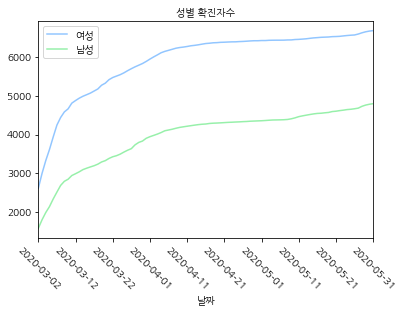

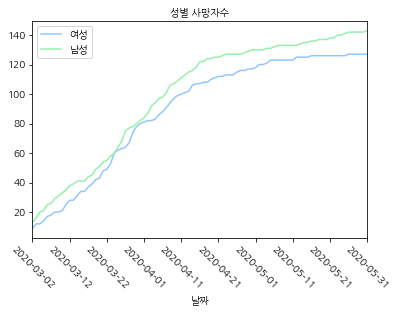

In [32]:
df1_1.plot()
plt.title('성별 확진자수',size=10)
plt.xlabel('날짜', size=10)
plt.xticks(rotation=-45)
df1_2.plot()
plt.title('성별 사망자수',size=10)
plt.xlabel('날짜', size=10)
plt.xticks(rotation=-45)

In [32]:
TimeProvince=pd.read_csv('C:/Users/HOME/Desktop/수DA쟁이/20201127_TEAMPROJECT_4/코로나19/coronavirusdataset_20200601/TimeProvince.csv')

In [33]:
TimeProvince.head(20)

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
5,2020-01-20,16,Daejeon,0,0,0
6,2020-01-20,16,Ulsan,0,0,0
7,2020-01-20,16,Sejong,0,0,0
8,2020-01-20,16,Gyeonggi-do,0,0,0
9,2020-01-20,16,Gangwon-do,0,0,0


In [34]:
TimeProvince.replace(["Seoul", "Busan", "Daegu", "Chungcheongbuk-do", "Chungcheongnam-do", 
              "Daejeon", "Gangwon-do", "Gwangju", "Gyeonggi-do", "Gyeongsangbuk-do",
              "Gyeongsangnam-do", "Incheon", "Sejong", "Ulsan", "Jeollanam-do",
              "Jeollabuk-do" ,"Jeju-do"],
             ["서울", "부산", "대구", "충청북도", "충청남도",
              "대전", "강원도", "광주", "경기도", "경상북도",
              "경상남도", "인천", "세종", "울산", "전라남도",
              "전라북도" ,"제주도"],inplace=True)

In [35]:
TimeProvince.drop(['time'],axis=1,inplace=True)

In [36]:
TimeProvince

,date,province,confirmed,released,deceased
0,2020-01-20,서울,0,0,0
1,2020-01-20,부산,0,0,0
2,2020-01-20,대구,0,0,0
3,2020-01-20,인천,1,0,0
4,2020-01-20,광주,0,0,0
...,...,...,...,...,...
2256,2020-05-31,전라북도,21,19,0
2257,2020-05-31,전라남도,19,17,0
2258,2020-05-31,경상북도,1379,1295,54
2259,2020-05-31,경상남도,123,121,0


In [37]:
TimeProvince=TimeProvince.sort_values(['province','date'])
TimeProvince= TimeProvince.rename(columns={'date':"날짜",'province':"지역",'confirmed':"확진자수",'released':"완치자수",'deceased':"사망자수"})
TimeProvince

,날짜,지역,확진자수,완치자수,사망자수
9,2020-01-20,강원도,0,0,0
26,2020-01-21,강원도,0,0,0
43,2020-01-22,강원도,0,0,0
60,2020-01-23,강원도,0,0,0
77,2020-01-24,강원도,0,0,0
...,...,...,...,...,...
2186,2020-05-27,충청북도,60,46,0
2203,2020-05-28,충청북도,60,46,0
2220,2020-05-29,충청북도,60,46,0
2237,2020-05-30,충청북도,60,49,0


In [38]:
TimeProvince_=TimeProvince[TimeProvince['날짜']=='2020-05-31']
TimeProvince_

,날짜,지역,확진자수,완치자수,사망자수
2253,2020-05-31,강원도,57,50,3
2252,2020-05-31,경기도,840,650,19
2259,2020-05-31,경상남도,123,121,0
2258,2020-05-31,경상북도,1379,1295,54
2248,2020-05-31,광주,32,30,0
2246,2020-05-31,대구,6883,6607,185
2249,2020-05-31,대전,46,42,1
2245,2020-05-31,부산,147,138,3
2244,2020-05-31,서울,861,627,4
2251,2020-05-31,세종,47,47,0


In [39]:
TimeProvince=TimeProvince.set_index('날짜')
TimeProvince

,지역,확진자수,완치자수,사망자수
날짜,,,,
2020-01-20,강원도,0,0,0
2020-01-21,강원도,0,0,0
2020-01-22,강원도,0,0,0
2020-01-23,강원도,0,0,0
2020-01-24,강원도,0,0,0
...,...,...,...,...
2020-05-27,충청북도,60,46,0
2020-05-28,충청북도,60,46,0
2020-05-29,충청북도,60,46,0


In [40]:
df2_1=pd.DataFrame()
df2_1['부산']=TimeProvince[TimeProvince['지역']=='부산']['확진자수']
df2_1['충청북도']=TimeProvince[TimeProvince['지역']=='충청북도']['확진자수']
df2_1['충청남도']=TimeProvince[TimeProvince['지역']=='충청남도']['확진자수']
df2_1['대구']=TimeProvince[TimeProvince['지역']=='대구']['확진자수']
df2_1['대전']=TimeProvince[TimeProvince['지역']=='대전']['확진자수']
df2_1['강원도']=TimeProvince[TimeProvince['지역']=='강원도']['확진자수']
df2_1['광주']=TimeProvince[TimeProvince['지역']=='광주']['확진자수']
df2_1['경기도']=TimeProvince[TimeProvince['지역']=='경기도']['확진자수']
df2_1['경상북도']=TimeProvince[TimeProvince['지역']=='경상북도']['확진자수']
df2_1['경상남도']=TimeProvince[TimeProvince['지역']=='경상남도']['확진자수']
df2_1['인천']=TimeProvince[TimeProvince['지역']=='인천']['확진자수']
df2_1['제주도']=TimeProvince[TimeProvince['지역']=='제주도']['확진자수']
df2_1['전라북도']=TimeProvince[TimeProvince['지역']=='전라북도']['확진자수']
df2_1['전라남도']=TimeProvince[TimeProvince['지역']=='전라남도']['확진자수']
df2_1['세종']=TimeProvince[TimeProvince['지역']=='세종']['확진자수']
df2_1['서울']=TimeProvince[TimeProvince['지역']=='서울']['확진자수']
df2_1['울산']=TimeProvince[TimeProvince['지역']=='울산']['확진자수']
df2_1

,부산,충청북도,충청남도,대구,대전,강원도,광주,경기도,경상북도,경상남도,인천,제주도,전라북도,전라남도,세종,서울,울산
날짜,,,,,,,,,,,,,,,,,
2020-01-20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-21,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-27,144,60,145,6878,45,56,30,774,1378,123,158,14,21,18,47,802,50
2020-05-28,145,60,146,6880,45,56,30,795,1379,123,180,14,21,18,47,826,50
2020-05-29,145,60,146,6880,45,56,30,815,1379,123,198,14,21,18,47,846,50


In [41]:
df2_2=pd.DataFrame()
df2_2['부산']=TimeProvince[TimeProvince['지역']=='부산']['사망자수']
df2_2['충청북도']=TimeProvince[TimeProvince['지역']=='충청북도']['사망자수']
df2_2['충청남도']=TimeProvince[TimeProvince['지역']=='충청남도']['사망자수']
df2_2['대구']=TimeProvince[TimeProvince['지역']=='대구']['사망자수']
df2_2['대전']=TimeProvince[TimeProvince['지역']=='대전']['사망자수']
df2_2['강원도']=TimeProvince[TimeProvince['지역']=='강원도']['사망자수']
df2_2['광주']=TimeProvince[TimeProvince['지역']=='광주']['사망자수']
df2_2['경기도']=TimeProvince[TimeProvince['지역']=='경기도']['사망자수']
df2_2['경상북도']=TimeProvince[TimeProvince['지역']=='경상북도']['사망자수']
df2_2['경상남도']=TimeProvince[TimeProvince['지역']=='경상남도']['사망자수']
df2_2['인천']=TimeProvince[TimeProvince['지역']=='인천']['사망자수']
df2_2['제주도']=TimeProvince[TimeProvince['지역']=='제주도']['사망자수']
df2_2['전라북도']=TimeProvince[TimeProvince['지역']=='전라북도']['사망자수']
df2_2['전라남도']=TimeProvince[TimeProvince['지역']=='전라남도']['사망자수']
df2_2['세종']=TimeProvince[TimeProvince['지역']=='세종']['사망자수']
df2_2['서울']=TimeProvince[TimeProvince['지역']=='서울']['사망자수']
df2_2['울산']=TimeProvince[TimeProvince['지역']=='울산']['사망자수']
df2_2

,부산,충청북도,충청남도,대구,대전,강원도,광주,경기도,경상북도,경상남도,인천,제주도,전라북도,전라남도,세종,서울,울산
날짜,,,,,,,,,,,,,,,,,
2020-01-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-27,3,0,0,184,1,3,0,19,54,0,0,0,0,0,0,4,1
2020-05-28,3,0,0,184,1,3,0,19,54,0,0,0,0,0,0,4,1
2020-05-29,3,0,0,184,1,3,0,19,54,0,0,0,0,0,0,4,1


In [42]:
df2_3=pd.DataFrame()
df2_3['부산']=TimeProvince[TimeProvince['지역']=='부산']['완치자수']
df2_3['충청북도']=TimeProvince[TimeProvince['지역']=='충청북도']['완치자수']
df2_3['충청남도']=TimeProvince[TimeProvince['지역']=='충청남도']['완치자수']
df2_3['대구']=TimeProvince[TimeProvince['지역']=='대구']['완치자수']
df2_3['대전']=TimeProvince[TimeProvince['지역']=='대전']['완치자수']
df2_3['강원도']=TimeProvince[TimeProvince['지역']=='강원도']['완치자수']
df2_3['광주']=TimeProvince[TimeProvince['지역']=='광주']['완치자수']
df2_3['경기도']=TimeProvince[TimeProvince['지역']=='경기도']['완치자수']
df2_3['경상북도']=TimeProvince[TimeProvince['지역']=='경상북도']['완치자수']
df2_3['경상남도']=TimeProvince[TimeProvince['지역']=='경상남도']['완치자수']
df2_3['인천']=TimeProvince[TimeProvince['지역']=='인천']['완치자수']
df2_3['제주도']=TimeProvince[TimeProvince['지역']=='제주도']['완치자수']
df2_3['전라북도']=TimeProvince[TimeProvince['지역']=='전라북도']['완치자수']
df2_3['전라남도']=TimeProvince[TimeProvince['지역']=='전라남도']['완치자수']
df2_3['세종']=TimeProvince[TimeProvince['지역']=='세종']['완치자수']
df2_3['서울']=TimeProvince[TimeProvince['지역']=='서울']['완치자수']
df2_3['울산']=TimeProvince[TimeProvince['지역']=='울산']['완치자수']
df2_3

,부산,충청북도,충청남도,대구,대전,강원도,광주,경기도,경상북도,경상남도,인천,제주도,전라북도,전라남도,세종,서울,울산
날짜,,,,,,,,,,,,,,,,,
2020-01-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-27,135,46,141,6557,40,48,30,646,1287,119,93,13,19,17,47,618,42
2020-05-28,136,46,141,6576,40,49,30,646,1291,119,93,13,19,17,47,621,44
2020-05-29,136,46,141,6587,42,50,30,647,1293,119,93,13,19,17,47,623,44


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text xticklabel objects>)

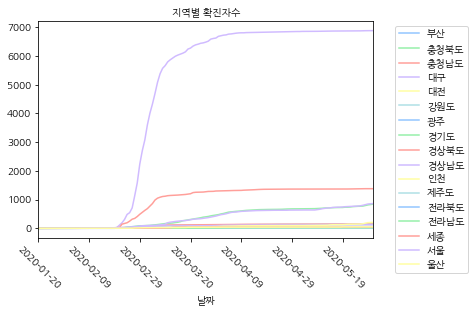

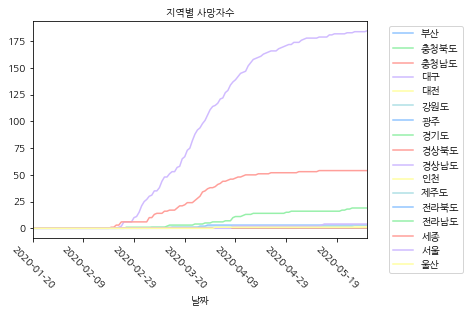

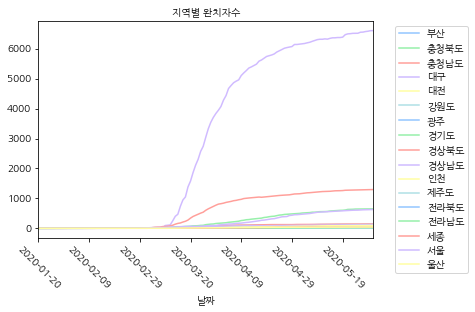

In [44]:
df2_1.plot()
plt.legend(bbox_to_anchor=(1.05,1))
plt.title('지역별 확진자수',size=10)
plt.xlabel('날짜', size=10)
plt.xticks(rotation=-45)
df2_2.plot()
plt.legend(bbox_to_anchor=(1.05,1))
plt.title('지역별 사망자수',size=10)
plt.xlabel('날짜', size=10)
plt.xticks(rotation=-45)
df2_3.plot()
plt.legend(bbox_to_anchor=(1.05,1))
plt.title('지역별 완치자수',size=10)
plt.xlabel('날짜', size=10)
plt.xticks(rotation=-45)

In [43]:
ProvinceGroup=TimeProvince_.groupby(['지역']).sum()
ProvinceGroup

,확진자수,완치자수,사망자수
지역,,,
강원도,57,50,3
경기도,840,650,19
경상남도,123,121,0
경상북도,1379,1295,54
광주,32,30,0
대구,6883,6607,185
대전,46,42,1
부산,147,138,3
서울,861,627,4


Text(0.5, 0, '지역')

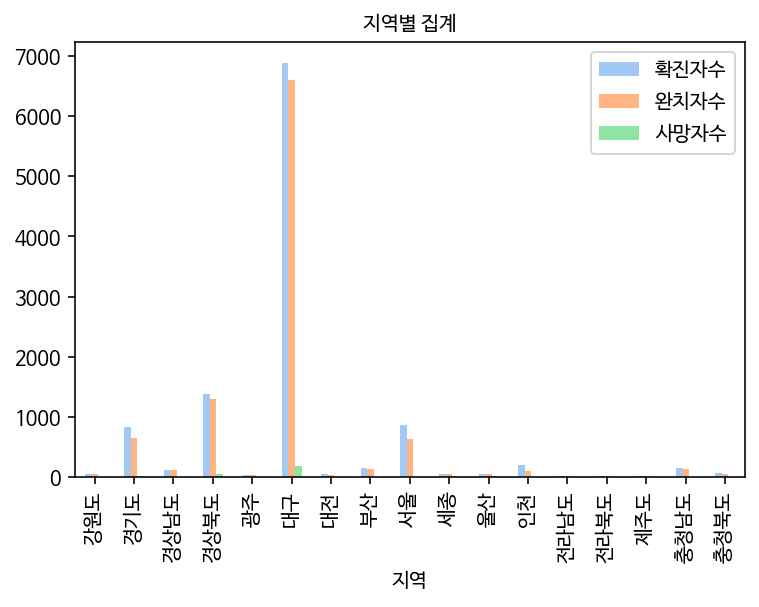

In [49]:
import seaborn as sns
ProvinceGroup.plot(kind='bar')
sns.set_palette("pastel")
plt.title('지역별 집계',size=10)
plt.xlabel('지역', size=10)